## Carregar les dades: https://github.com/lidiamontero/Project-Machine-Learning/blob/main/Sprint6T6-1.ipynb

In [671]:
csv_url = "https://raw.githubusercontent.com/ITACADEMYprojectes/projecteML/main/bank_dataset.CSV"
df = pd.read_csv(csv_url)

## Informació general, primeres files i sumari estadístic

In [673]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Histogrames per les variables numèriques

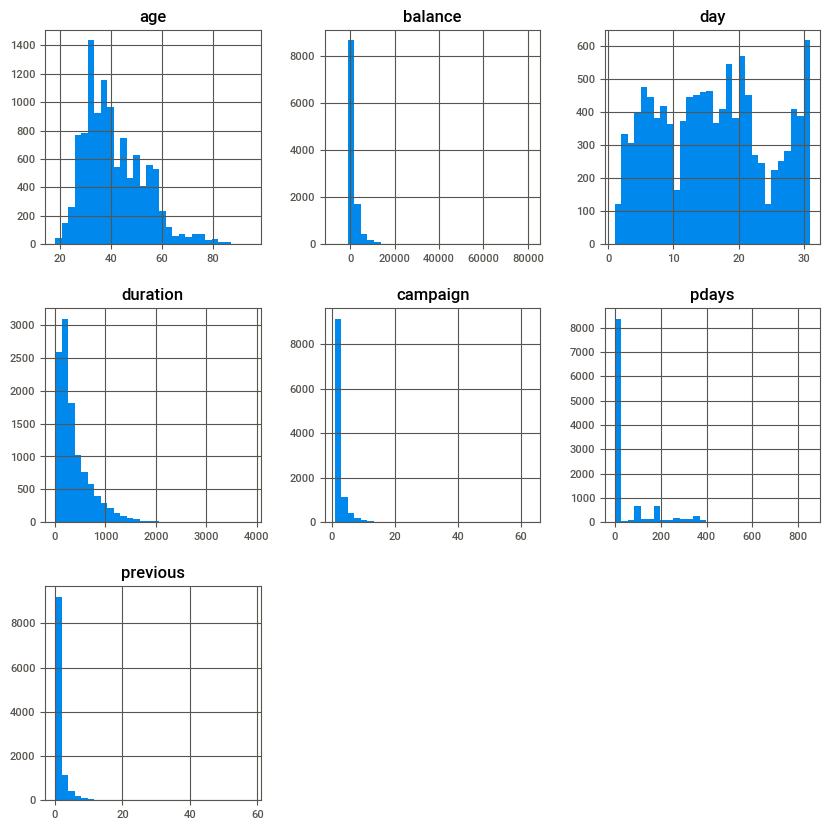

In [675]:
vars_con = [1,5,9,11,12,13,14]
vars_fac = [2,3,4,6,7,8,10,15,16]
df.hist(bins=30, figsize=(10, 10))
plt.show()

## Boxplot per detecció d'outliers univariants en les variables numèriques

No és gaire informatiu doncs les escales són molt diferents. 

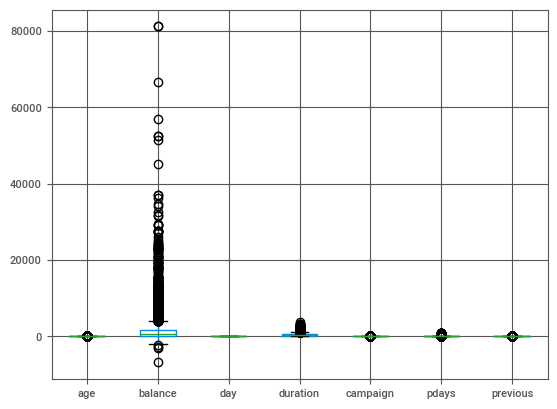

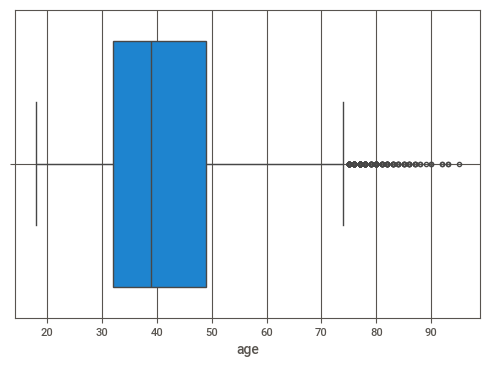

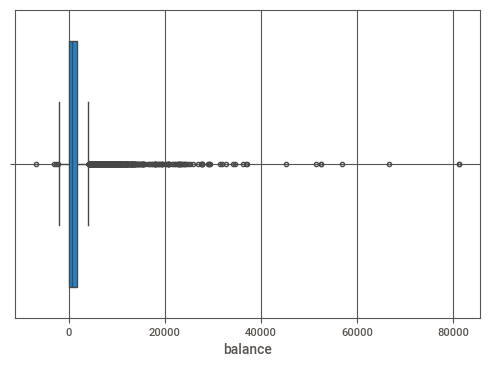

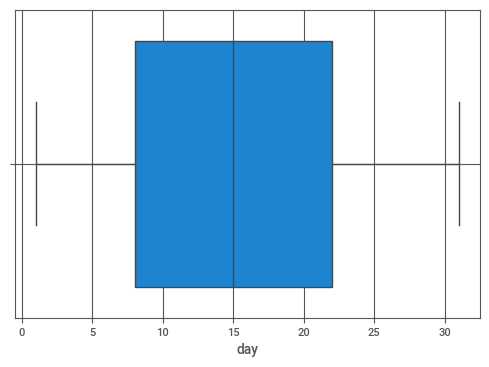

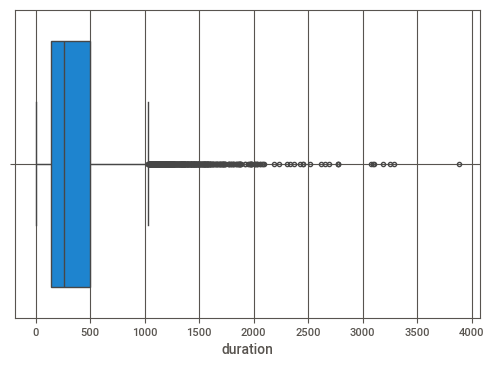

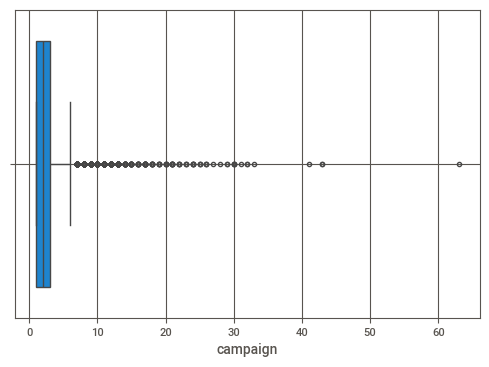

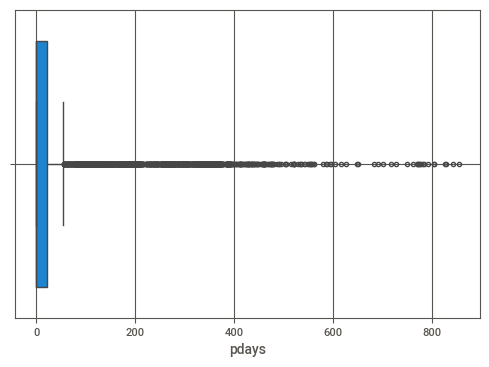

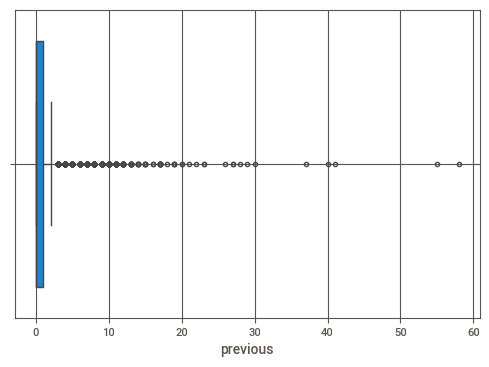

In [677]:
df.boxplot()
plt.show()
colsnum = df.select_dtypes(include=["number"]).columns.tolist()
for column in colsnum:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No se detectan outliers

### Anàlisi una a una de les variables numèriques per detectar outliers
Després d'examinar el boxplot i calcular les fites superiors als outliers suaus i severs decideixo no intervenir: els outliers d'age són correctes, raonables i no cal intervenció en aquest punt, potser desestimar les persones més grans de 80 anys en la modelització (dificultats de comprensió dels productes finances, jo crec que majorment no n'estan interessats).

32.0
49.0
IQR 17.0
Llindar superior outliers suaus 74.5
Llindar superior outliers severs 100.0


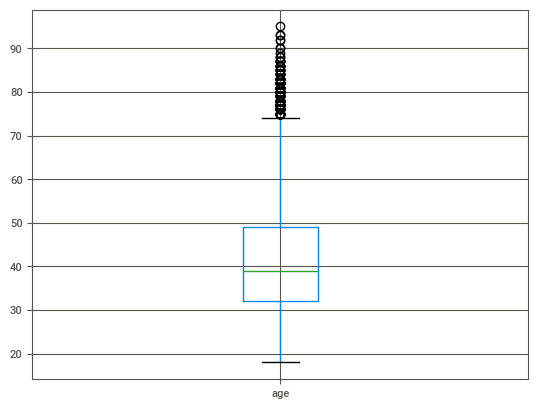

In [679]:
p = df.boxplot(column=['age'], return_type='axes')
p.plot()
print( df['age'].quantile(0.25))
print( df['age'].quantile(0.75)) 

# 50% de la població està entre 32 i 49
# Llindars per outliers suaus
# print(np.min(edat), np.quantile(edat, 0.25), np.median(edat), np.quantile(edat, 0.75), np.max(edat))
iqr = df['age'].quantile(0.75)-df['age'].quantile(0.25)
print("IQR",iqr)
upthr = df['age'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
print("Llindar superior outliers severs",df['age'].quantile(0.75)+3*iqr)
# Per ara no cal tractar els outliers d'age

#### Balance
Distribució extrema, tipus Pareto, per tant els outliers són consustancials, però a partir de 40000 caldria suprimir les observacions 
o millor imputar-les a la mediana. Quines són?. Hi ha outliers severs inferiors que tractaré imputant a -4636 (llindar d'outlier sever inferior). Per tant, és com aplicar una Winzorització a mida.


Llindar superior outliers suaus 4087.0
Llindar superior outliers severs 6466.0
Llindar inferior outliers severs -4636.0


-6847

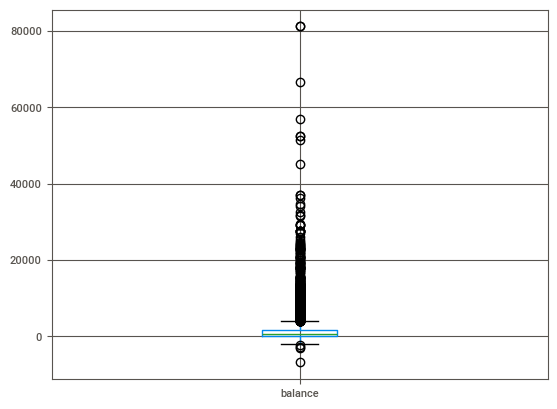

In [681]:
p = df.boxplot(column=['balance'], return_type='axes')
p.plot()
# 50% de la població està entre 32 i 49
# Llindars per outliers suaus
iqr = df['balance'].quantile(0.75)-df['balance'].quantile(0.25)
iqr
upthr = df['balance'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['balance'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
lothr = df['balance'].quantile(0.25)-3*iqr
print("Llindar inferior outliers severs",lothr)
df['balance'].min()

[]

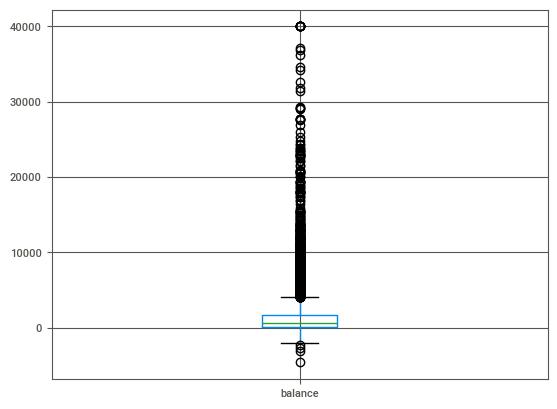

In [682]:
cols = ['balance']
df.loc[df['balance'] > 40000, cols] = 40000
df.loc[df['balance'] < -4636, cols] = -4636
# print( df.isnull().sum())
#df['balance'] = df['balance'].fillna(df['balance'].median())
p = df.boxplot(column=['balance'], return_type='axes')
p.plot()

#### Day
Cap problema com era d'esperar a day

Llindar superior outliers suaus 43.0
Llindar superior outliers severs 64.0


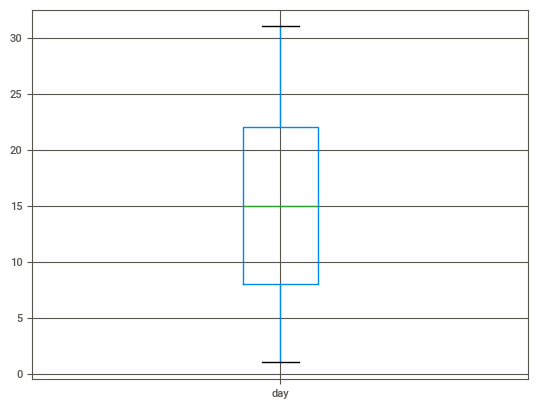

In [684]:
p = df.boxplot(column=['day'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df['day'].quantile(0.75)-df['day'].quantile(0.25)
iqr
upthr = df['day'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['day'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# 

#### Duration
Torna a tenir una caiguda exponencial, però hi ha molts zeros, per ara imputo els outliers extrems superiors a 2000

Llindar superior outliers suaus 1033.0
Llindar superior outliers severs 1570.0


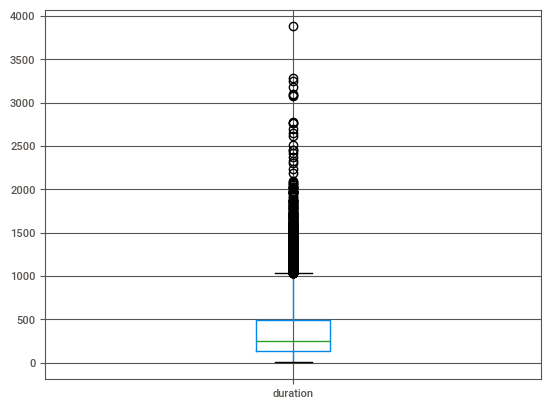

In [686]:
p = df.boxplot(column=['duration'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df['duration'].quantile(0.75)-df['duration'].quantile(0.25)
iqr
upthr = df['duration'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df['duration'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)

#### Previous
Torna a tenir una caiguda exponencial, però hi ha molts zeros, els outliers extrems superiors els imputo a 30

Llindar superior outliers suaus 8.5
Llindar superior outliers severs 13.0


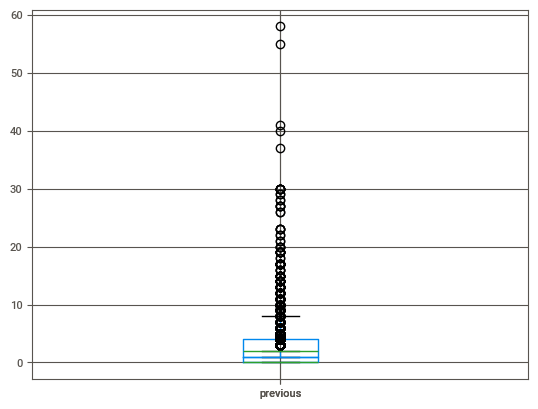

In [688]:
#p = df.boxplot(column=['previous'], return_type='axes')
#p.plot()
cols = ['previous']
df1 = df.loc[df['previous'] >0, cols]
p = df1.boxplot(column=['previous'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['previous'].quantile(0.75)-df1['previous'].quantile(0.25)
iqr
upthr = df1['previous'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['previous'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
df.loc[df['previous'] > 30, cols] = 30
p = df.boxplot(column=['previous'], return_type='axes')
# Torna a tenir una cua superior, per ara no pup.plot()c prendre una decisió de qué fer

#### Pdays
*Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)*

Torna a tenir una caiguda exponencial, però hi ha molts -1 dels qui no han participat en campanyes anteriors, per ara filtro les observacions dels qui han participat en alguna campanya anterior i els outliers extrems superiors els deixo com estan, per ara.

Llindar superior outliers suaus 568.0
Llindar superior outliers severs 850.0


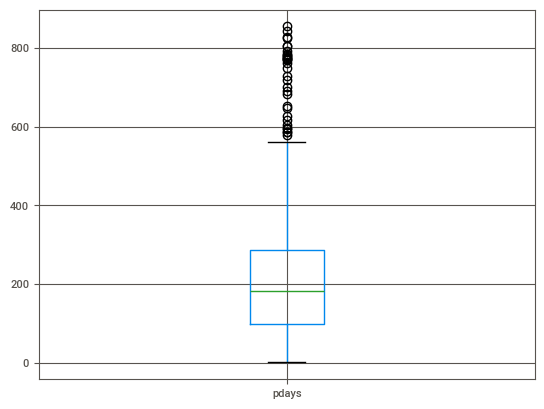

In [690]:
# Delicat, hi ha observacions -1
cols = ['pdays']
df1 = df.loc[df['pdays'] >-1, cols]
p = df1.boxplot(column=['pdays'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['pdays'].quantile(0.75)-df1['pdays'].quantile(0.25)
iqr
upthr = df1['pdays'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['pdays'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# No cal fer res

#### Campaign
*Number of contacts performed during this campaign and for this client (numeric, includes last contact)*

Torna a tenir una caiguda exponencial, però hi ha molts 0 dels qui no han estat localitzats a la campanya, per ara filtro les observacions dels qui no han participat en la campanya actual i els outliers extrems superiors (superiors a 35) d'aquest subconjunt els deixo com estan, per ara.

Llindar superior outliers suaus 6.0
Llindar superior outliers severs 9.0


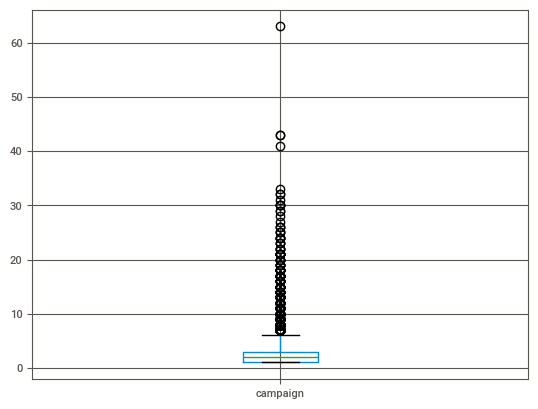

In [692]:
# Delicat, hi ha observacions 0
cols = ['campaign']
df1 = df.loc[df['campaign'] >0, cols]
p = df1.boxplot(column=['campaign'], return_type='axes')
p.plot()
# Llindars per outliers suaus
iqr = df1['campaign'].quantile(0.75)-df1['campaign'].quantile(0.25)
iqr
upthr = df1['campaign'].quantile(0.75)+1.5*iqr
print("Llindar superior outliers suaus",upthr)
upthr = df1['campaign'].quantile(0.75)+3*iqr
print("Llindar superior outliers severs",upthr)
# No cal fer res

## Comptar les categories dels factors

Massa categories en el factor job, caldrà reagrupar-les molt possiblement. Per altra banda, tots els factors amb nivell unknown i poques observacions 'unknown' cal resseguir-les, donarà problemes en la modelització (regressió logística).

**Cal remarcar que el target diposit està balancejat (Yes/No)**

In [694]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

## Visualització valors nuls
No es veu res, per tant millor comptar-los

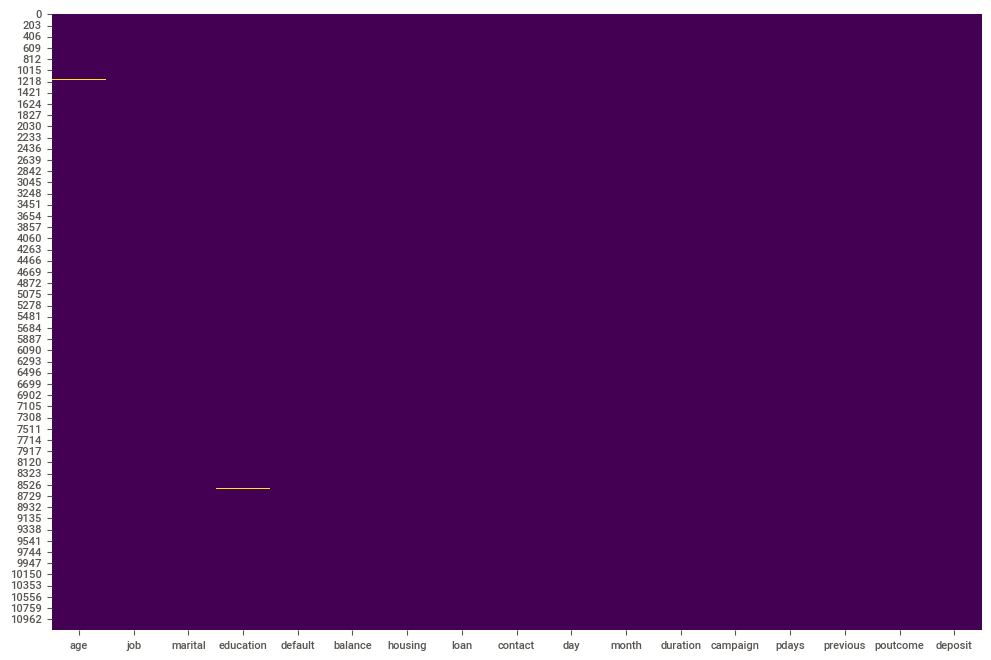

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [696]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
df.isnull().sum()

## Dades faltants
Marital té 3 categories i 5 missings, per tant caldria una categoria "unknown" 
Education té 10 missings i ja té definida la categoria "unknown", per tant cal assignar aquesta categoria
Age té 10 missings, es podria fer una imputació amb la mediana doncs no sé com fer imputacions més intel.ligents amb Python
No sé com fer-ho sense Stackoverflow, em mata no saber usar les funcions bàsiques en Python

In [698]:
df['age'] = df['age'].fillna(df['age'].median())
df['education'] = df['education'].fillna('unknown')
df['marital'] = df['marital'].fillna('unknown')
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Anàlisi Exploratòria univariant automatitzada amb Sweetviz

**Impresionant**

In [700]:
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


En aquest punt m'interessa perfilar la relació de les variables numèriques amb el target deposit, ara bé, això està fet al report pels factors (basat en el que diuen un index d'incertesa, m'hauria agradat més veure un pvalor del test chi quadrat entre deposit i cadascun dels factors):

    -poutcome 0.07
    -month 0.07
    -contact 0.05
    -housing 0.03
    -job 0.02
    -loan 0.01
    -education 0.01
    -marital 0.01
    -default 0.00

I per les numèriques es pot extreure també una associació (en diu correlació, incorrecte el terme, m'agradaria veure el pvalor d'un test no paramètric tipus Kruskal-Wallis amb variable continua segons factor dipòsit o un Wilcoxon doncs té dos nivells el target que en Python és Mann-Whitney U rank test per 2 mostres independents).

    -duration 0.45
    -pdays 0.15
    -previous 0.14
    -campaign 0.13
    -balance 0.08
    -day 0.06 (aquesta variable no té sentit usar-la directament)
    -age 0.04



## Associació bivariant entre target deposit i numèriques
### pdays

MannwhitneyuResult(statistic=array([18454802.]), pvalue=array([6.23493583e-112]))


<Axes: xlabel='deposit', ylabel='pdays'>

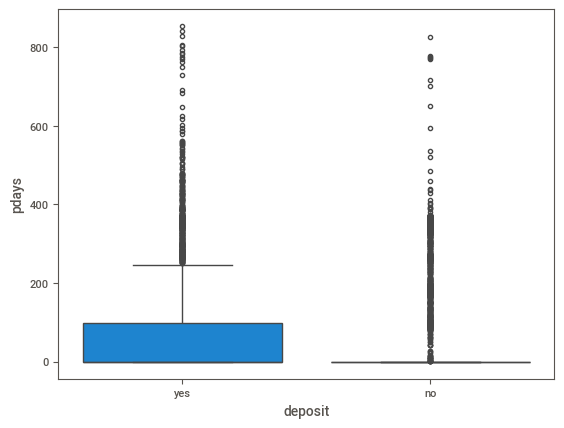

In [703]:
# Defining data groups
from scipy import stats
cols = ['pdays']
df1 = df.loc[df['deposit'] =='yes', cols]
df2 = df.loc[df['deposit'] =='no', cols] 
# Conduct the Mann-Whitney U Test 
result = stats.mannwhitneyu(df1, df2)
# Print the result
print(result)
# Vull visualitzar els boxplots de pdays a cada categoria de deposit

# create grouped boxplot  
sns.boxplot(x = df['deposit'], 
            y = df['pdays'], 
            hue = df['deposit'])


### previous

Clarament vec ara que cal tractar els outliers severs que havia detectat (per sobre de 50 trucades)

MannwhitneyuResult(statistic=array([18687528.]), pvalue=array([2.5996891e-130]))


<Axes: xlabel='deposit', ylabel='previous'>

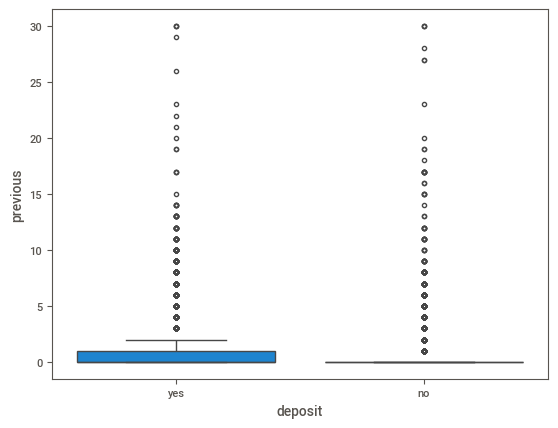

In [705]:
# Defining data groups
from scipy import stats
cols = ['previous']
df1 = df.loc[df['deposit'] =='yes', cols]
df2 = df.loc[df['deposit'] =='no', cols] 
# Conduct the Mann-Whitney U Test 
result = stats.mannwhitneyu(df1, df2)
# Print the result
print(result)
# Vull visualitzar els boxplots de previous a cada categoria de deposit
# create grouped boxplot  
sns.boxplot(x = df['deposit'], 
            y = df['previous'], 
            hue = df['deposit'])


## Associació bivariant entre target deposit i factors
### poutcome

deposit     no   yes
poutcome            
failure    610   618
other      230   307
success     93   978
unknown   4940  3386
deposit         no       yes
poutcome                    
failure   0.496743  0.503257
other     0.428305  0.571695
success   0.086835  0.913165
unknown   0.593322  0.406678
deposit         no       yes
poutcome                    
failure   0.103865  0.116846
other     0.039162  0.058045
success   0.015835  0.184912
unknown   0.841137  0.640197
The Chisq Stat, degrees of freedom and P-Value of the ChiSq Test are: 1004.635780185333 3 1.7761850102620281e-217


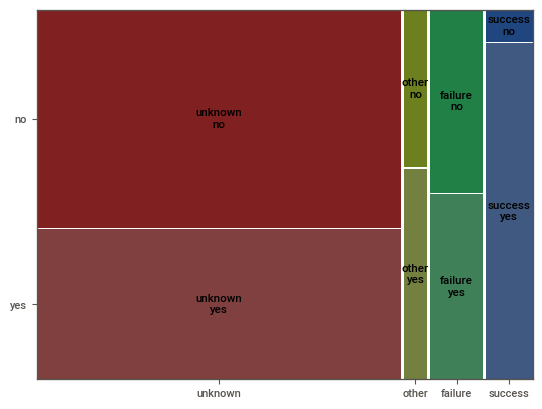

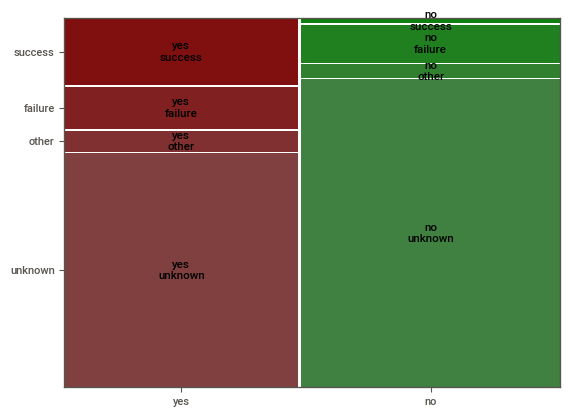

In [707]:
CrosstabResult = pd.crosstab(index=df['poutcome'], columns=df['deposit'])
print(CrosstabResult)
CrosstabRows = pd.crosstab(index=df['poutcome'], columns=df['deposit'], normalize="index")
print(CrosstabRows)
CrosstabCols = pd.crosstab(index=df['poutcome'], columns=df['deposit'], normalize="columns")
print(CrosstabCols)

# Mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['poutcome', 'deposit'])
mosaic(df, [ 'deposit', 'poutcome'])
# importing the required function
from scipy.stats import chi2_contingency
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
print('The Chisq Stat, degrees of freedom and P-Value of the ChiSq Test are:', ChiSqResult[0], ChiSqResult[2], ChiSqResult[1])

Clarament els qui van contractar en una campanya anterior un dipòsit, tenen una probabilitat per sobre el 90% de contractar-ne un altre a la campanya actual, tantmateix si no van contractar-lo no afecta a la situació actual, però si són nous en les campanyes, aleshores és una mica inferior la probabilitat de contractar.

# Conclusions EDA

Després de l'EDA univariant and bivariant (perfilar target) es té una comprensió més fina de les característiques del dataset. 

# Preparació de les mostres de treball i de test (Tasca 6.1). Estratificació segons el target

In [712]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Dividir el dataset en conjunts de treball i test 75-25 Estratificat pel target diposit
train, test = train_test_split(df, test_size=0.25, random_state=28061963, stratify=df['deposit'])
tr = train.groupby('deposit').count()
tst = test.groupby('deposit').count()
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)
print("Tamany del conjunt de treball (train):", train.shape)
print("Tamany del conjunt de test (test):", test.shape)

Tamany del conjunt de treball (train): (8371, 17)
Tamany del conjunt de test (test): (2791, 17)


#### Correlació entre numèriques a la mostra test per prevenir la multicolinearitat

La correlació més elevada és de 0.54 entre previous i pdays a la working sample (0.49 a la test sample). La correlació entre la resta de parelles de variables és desestimable.

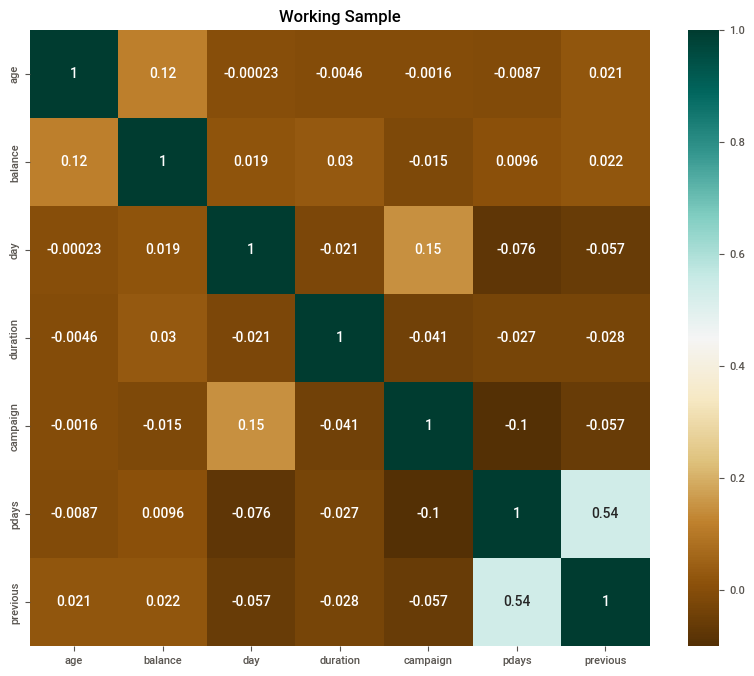

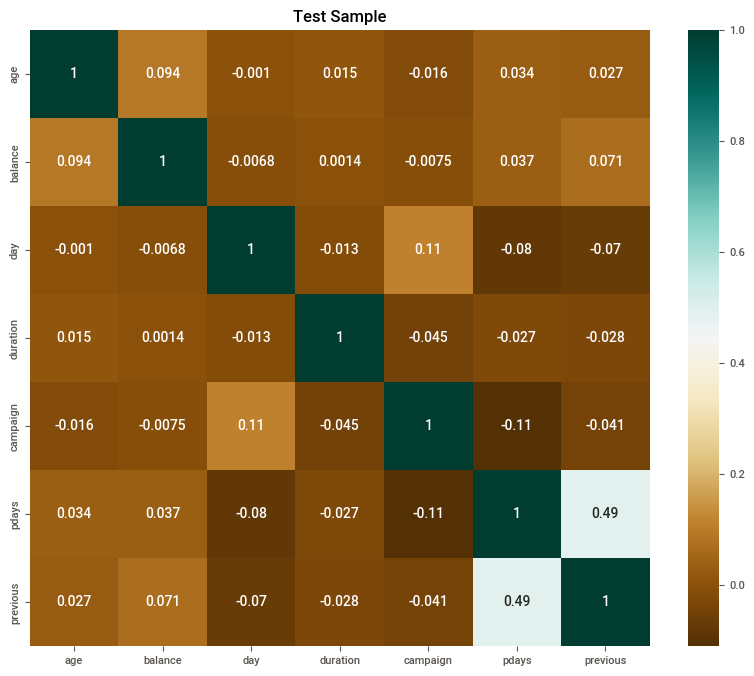

In [714]:
# Filtrar les columnes numèriques de la mostra de treball
train_numeric = train.select_dtypes(include=['number'])
train_factor = train.select_dtypes(include=['object'])
# Correlació entre les variables numèriques de la working sample
wcorr_matrix = train_numeric.corr()
# Pintar el heatmap amb les correlacions entre numèriques de la mostra de treball
plt.figure(figsize=(10, 8))
sns.heatmap(wcorr_matrix, annot=True, cmap='BrBG').set_title('Working Sample')
plt.show()

# Correlació entre les variables numèriques de la test sample
test_numeric = test.select_dtypes(include=['number'])
test_factor = test.select_dtypes(include=['object'])
tcorr_matrix = test_numeric.corr()
# Pintar el heatmap amb les correlacions entre numèriques de la mostra de treball
plt.figure(figsize=(10, 8))
sns.heatmap(tcorr_matrix, annot=True, cmap='BrBG').set_title('Test Sample')
plt.show()
# La correlació més elevada és de 0.52 entre previous i pdays. La correlació entre la resta de parelles de variables és desestimable.

## Estandardització
**Ho evitaré el màxim de temps que pugui doncs perdo la possibilitat de fer una interpretació directa del estimadors del model de regressió logística** que aplicaré. Sé que no és el que suggereix el curs, però personalment ho evito; més tard puc repetir l'exercici amb estandardització.

In [716]:
# Especificar las columnas numéricas a estandarizar al working set. Day no té sentit. Pdays, campaign i previous tenen un munt de zeros
trainescalat = train
colsnum = train.select_dtypes(include=["number"]).columns.tolist()
print("Llista de columnes numèriques:", colsnum)
cols2Stand = ['age', 'balance','duration']
scaler = StandardScaler() # Inicialitzar l'escalat standard
trainescalat[cols2Stand] = scaler.fit_transform(trainescalat[cols2Stand])
trainescalat.to_csv('escalat_train.csv', index=False)
trainescalat.describe()

Llista de columnes numèriques: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


,age,balance,day,duration,campaign,pdays,previous
count,8.371000e+03,8.371000e+03,8371.000000,8.371000e+03,8371.000000,8371.000000,8371.000000
mean,4.838243e-17,-4.159192e-17,15.689284,-5.241430e-17,2.521682,50.071318,0.797276
std,1.000060e+00,1.000060e+00,8.435551,1.000060e+00,2.695871,107.059608,2.083186
min,-1.953483e+00,-2.045379e+00,1.000000,-1.063997e+00,1.000000,-1.000000,0.000000
25%,-7.759896e-01,-4.694695e-01,8.000000,-6.755277e-01,1.000000,-1.000000,0.000000
50%,-1.872430e-01,-3.280715e-01,15.000000,-3.411312e-01,2.000000,-1.000000,0.000000
75%,6.538234e-01,6.764444e-02,22.000000,3.646588e-01,3.000000,-1.000000,0.000000
max,4.522729e+00,1.273552e+01,31.000000,8.276338e+00,43.000000,828.000000,30.000000


In [717]:
# Especificar las columnas numéricas a estandarizar al test set. Day no té sentit. Pdays, campaign i previous tenen un munt de zeros
testescalat = test
#colsnum = testescalat.select_dtypes(include=["number"]).columns.tolist()
#print("Llista de columnes numèriques:", colsnum)
#cols2Stand = ['age', 'balance','duration']
scaler = StandardScaler() # Inicialitzar l'escalat standard
testescalat[cols2Stand] = scaler.fit_transform(testescalat[cols2Stand])
testescalat.to_csv('escalat_test.csv', index=False)
testescalat.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2.791000e+03,2.791000e+03,2791.000000,2.791000e+03,2791.000000,2791.000000,2791.000000
mean,1.126532e-16,5.091671e-18,15.564314,-3.055003e-17,2.468649,55.106772,0.909351
std,1.000179e+00,1.000179e+00,8.376965,1.000179e+00,2.799322,113.637114,2.385595
min,-1.943115e+00,-1.324860e+00,1.000000,-1.064899e+00,1.000000,-1.000000,0.000000
25%,-7.733060e-01,-4.678168e-01,8.000000,-6.693588e-01,1.000000,-1.000000,0.000000
50%,-1.884017e-01,-3.148115e-01,15.000000,-3.277555e-01,2.000000,-1.000000,0.000000
75%,6.471760e-01,6.324329e-02,21.000000,3.554510e-01,3.000000,83.500000,1.000000
max,4.240160e+00,1.375525e+01,31.000000,1.054961e+01,63.000000,854.000000,30.000000


                age       balance          day      duration     campaign  \
count  8.371000e+03  8.371000e+03  8371.000000  8.371000e+03  8371.000000   
mean   4.838243e-17 -4.159192e-17    15.689284 -5.241430e-17     2.521682   
std    1.000060e+00  1.000060e+00     8.435551  1.000060e+00     2.695871   
min   -1.953483e+00 -2.045379e+00     1.000000 -1.063997e+00     1.000000   
25%   -7.759896e-01 -4.694695e-01     8.000000 -6.755277e-01     1.000000   
50%   -1.872430e-01 -3.280715e-01    15.000000 -3.411312e-01     2.000000   
75%    6.538234e-01  6.764444e-02    22.000000  3.646588e-01     3.000000   
max    4.522729e+00  1.273552e+01    31.000000  8.276338e+00    43.000000   

             pdays     previous  
count  8371.000000  8371.000000  
mean     50.071318     0.797276  
std     107.059608     2.083186  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     828.000000    30.000000  


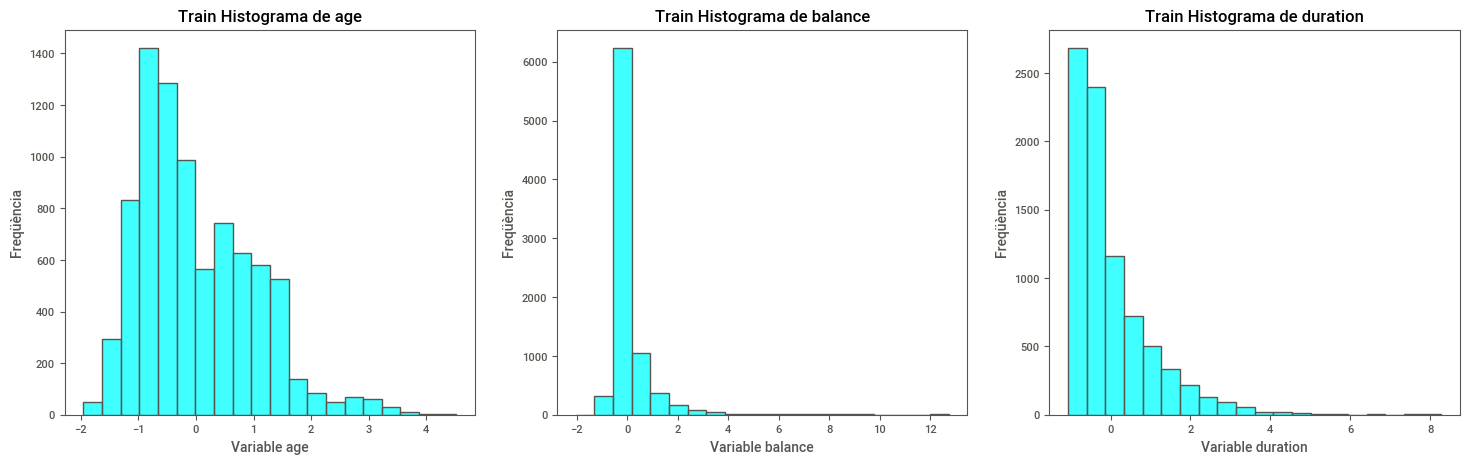

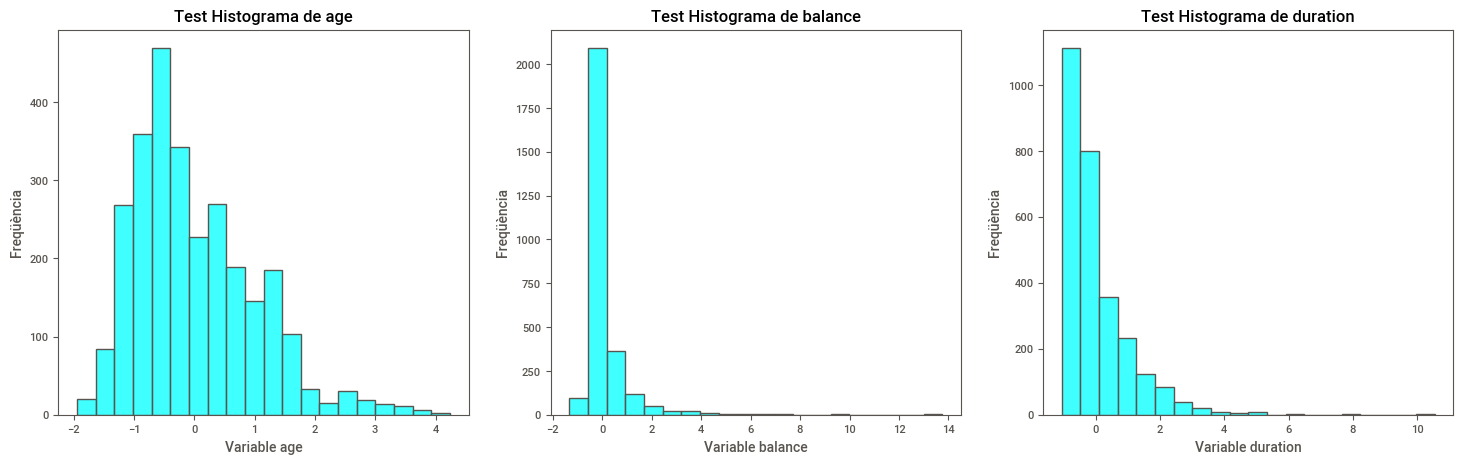

In [718]:
# Histogram of numeric variables
print( train.describe() )# Com fer-ho visible?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
# Definir les columnes a visualitzar
# Iterar sobre cada columna per crear un histograma
for i, column in enumerate(cols2Stand):
    sns.histplot(train[column], kde=False, ax=axes[i], color='cyan', bins=20)
    axes[i].set_title(f'Train Histograma de {column}')
    axes[i].set_xlabel(f'Variable {column}')
    axes[i].set_ylabel('Freqüència')
plt.show()
# Ara amb test
test.describe() # Com fer-ho visible?
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
# Definir les columnes a visualitzar
# Iterar sobre cada columna per crear un histograma
for i, column in enumerate(cols2Stand):
    sns.histplot(test[column], kde=False, ax=axes[i], color='cyan', bins=20)
    axes[i].set_title(f'Test Histograma de {column}')
    axes[i].set_xlabel(f'Variable {column}')
    axes[i].set_ylabel('Freqüència')
plt.show()

## Label Encoding vs. One-Hot Encoding

**Reducció del nombre de categories de les variables qualitatives (factors)**

Hi ha variables com job amb moltes categories, algunes amb poques observacions, busco agrupar categories segons la seva relació amb el target. Concretament redueixo les categories de job, marital (hi ha 1 unknown, que el poso a married), poutcome (unknown van a failure) i month, defining gjob (3), gmarital (3), gpoutcome (3) i gmonth (2)

job
management       1923
blue-collar      1503
technician       1347
admin.            963
services          690
retired           594
self-employed     302
unemployed        275
student           270
entrepreneur      245
housemaid         210
unknown            49
Name: count, dtype: int64
marital
married     4814
single      2589
divorced     964
unknown        4
Name: count, dtype: int64
education
secondary    4107
tertiary     2757
primary      1136
unknown       371
Name: count, dtype: int64
default
no     8239
yes     132
Name: count, dtype: int64
housing
no     4398
yes    3973
Name: count, dtype: int64
loan
no     7296
yes    1075
Name: count, dtype: int64
contact
cellular     6005
unknown      1777
telephone     589
Name: count, dtype: int64
month
may    2144
jul    1121
aug    1103
jun     914
apr     720
nov     715
feb     586
oct     284
jan     257
sep     238
mar     208
dec      81
Name: count, dtype: int64
poutcome
unknown    6287
failure     904
success     788
othe

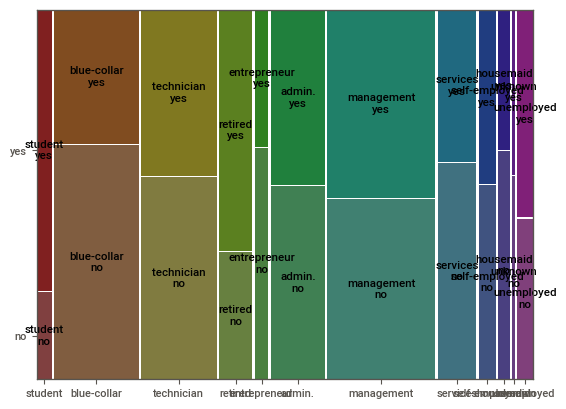

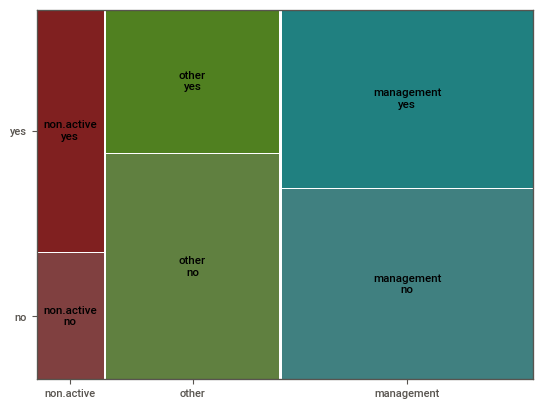

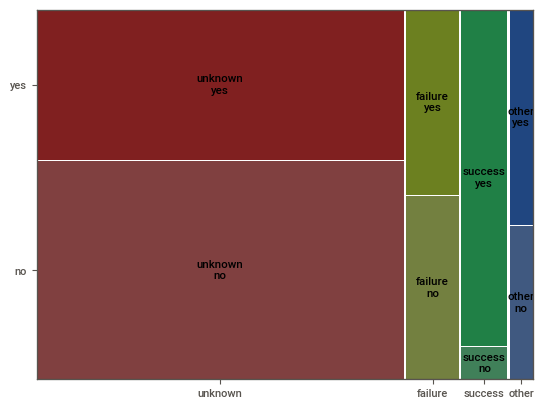

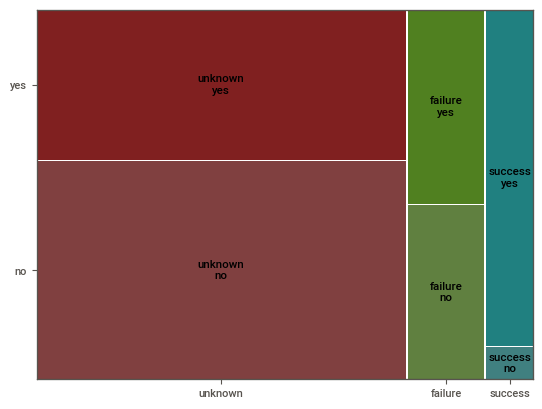

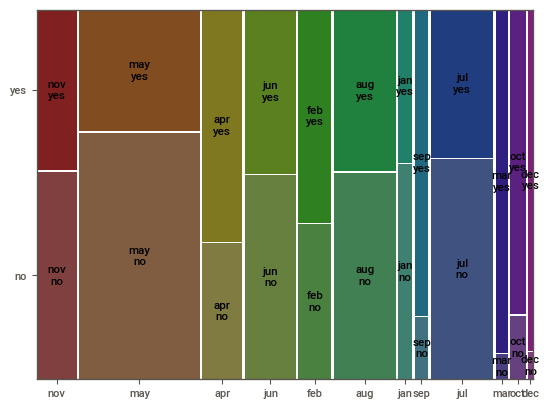

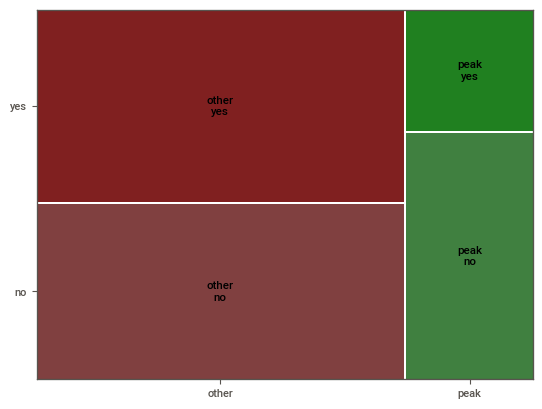

In [720]:
for column in train.select_dtypes(include=['object']).columns:
    print(train[column].value_counts())
from statsmodels.graphics.mosaicplot import mosaic
mosaic(train, ['job', 'deposit'])
# Definir la qualitativa gjob agrupa management + technician + admin.+unknown = management  student+retired+unemployed=non.active 
# la resta = other
train['gjob'] = ''
train.gjob =  np.where( train['job'].isin(["management","technician","admin.","unknown"]),    "management",    train.gjob ) 
train.gjob =  np.where( train['job'].isin(["student","retired","unemployed"]),    "non.active",  train.gjob )
train.gjob =  np.where( train['job'].isin(["blue-collar","services","enterpreneur","self-employer","housemaid"]), "other",   train.gjob )
train.gjob =  np.where( train['gjob'].isin([""]), "other",   train.gjob )

for column in train.select_dtypes(include=['object']).columns:
    print(train[column].value_counts())
mosaic(train, ['gjob', 'deposit'])

# poutcome
mosaic(train, ['poutcome', 'deposit'])
train['gpoutcome'] = train['poutcome']
train.gpoutcome =  np.where( train['poutcome'].isin(["other"]),    "failure",    train.gpoutcome ) 
mosaic(train, ['gpoutcome', 'deposit'])

# month
mosaic(train, ['month', 'deposit'])
train['gmonth'] = ''
train.gmonth =  np.where( train['month'].isin(["may","june","july","august"]),    "peak",    train.gmonth ) 
train.gmonth =  np.where( train['gmonth'].isin([""]), "other",   train.gmonth )
mosaic(train, ['gmonth', 'deposit'])

# marital
train['gmarital'] = train['marital']
train.gmarital =  np.where( train['gmarital'].isin(["unknown"]), "married",   train.gmarital )

train.to_csv('trainplus.csv', index=False)

## Reducció de la dimensionalitat en numèriques no és necessària pel limitat nombre de numèriques

## Aplicar la definició de noves categòriques a la mostra test

In [723]:
# Definir la qualitativa gjob agrupa management + technician + admin.+unknown = management  student+retired+unemployed=non.active 
# la resta = other
test['gjob'] = ''
test.gjob =  np.where( test['job'].isin(["management","technician","admin.","unknown"]),    "management",    test.gjob ) 
test.gjob =  np.where( test['job'].isin(["student","retired","unemployed"]),    "non.active",  test.gjob )
test.gjob =  np.where( test['job'].isin(["blue-collar","services","enterpreneur","self-employer","housemaid"]), "other",   test.gjob )
test.gjob =  np.where( test['gjob'].isin([""]), "other",   test.gjob )

# poutcome
test['gpoutcome'] = test['poutcome']
test.gpoutcome =  np.where( test['poutcome'].isin(["other"]),    "failure",    test.gpoutcome ) 

# month
test['gmonth'] = ''
test.gmonth =  np.where( test['month'].isin(["may","june","july","august"]),    "peak",    test.gmonth ) 
test.gmonth =  np.where( test['gmonth'].isin([""]), "other",   test.gmonth )

# marital
test['gmarital'] = test['marital']
test.gmarital =  np.where( test['gmarital'].isin(["unknown"]), "married",   test.gmarital )

for column in test.select_dtypes(include=['object']).columns:
    print(test[column].value_counts())

test.to_csv('testplus.csv', index=False)

job
management       643
technician       476
blue-collar      441
admin.           371
services         233
retired          184
self-employed    103
student           90
entrepreneur      83
unemployed        82
housemaid         64
unknown           21
Name: count, dtype: int64
marital
married     1535
single       928
divorced     327
unknown        1
Name: count, dtype: int64
education
secondary    1367
tertiary      928
primary       364
unknown       132
Name: count, dtype: int64
default
no     2755
yes      36
Name: count, dtype: int64
housing
no     1483
yes    1308
Name: count, dtype: int64
loan
no     2406
yes     385
Name: count, dtype: int64
contact
cellular     2037
unknown       569
telephone     185
Name: count, dtype: int64
month
may    680
aug    416
jul    393
jun    308
nov    228
apr    203
feb    190
oct    108
jan     87
sep     81
mar     68
dec     29
Name: count, dtype: int64
poutcome
unknown    2039
failure     324
success     283
other       145
Name: count,

## One-Hot encoding

Considero les variables contact, loan, housing, education, gjob, gmarital, gmonth i gpoutcome. Ha d'haver-hi una manera intel.ligent de fer-ho que no sigui per enumeració ... per em patina el Python

### Train

In [726]:
# creating one hot encoder object
cols2onehot = ['contact', 'default','loan', 'housing', 'education', 'gjob', 'gmarital', 'gmonth','gpoutcome']

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

onehotencoder = OneHotEncoder()
dfOneHot = pd.DataFrame()

for column in cols2onehot:
    X = onehotencoder.fit_transform(train[column].values.reshape(-1, 1)).toarray()
# Creating a DataFrame with the encoded data
    dfauxOneHot = pd.DataFrame(X, columns=[column + str(int(i)) for i in range(X.shape[1])])
    dfOneHot = pd.concat([dfOneHot, dfauxOneHot], axis=1)

# Concatenating the original DataFrame with the encoded DataFrame
train = pd.concat([train, dfOneHot], axis=1)
# Dropping the original columns, not now
# df = df.drop([cols2onehot], axis=1)
# Displaying the first few rows of the updated DataFrame
print(train.head())
print(train.describe())

for column in train.select_dtypes(include=['object']).columns:
    print(train[column].value_counts())
    
train.to_csv('trainplusOneHot.csv', index=False)

            age          job  marital  education default   balance housing  \
7440  -0.860096      student   single   tertiary      no -0.408539      no   
88    -0.607776  blue-collar  married    primary      no -0.280056     yes   
10373 -1.112416  blue-collar  married  secondary      no  0.909410      no   
1912  -0.607776  blue-collar  married  secondary      no -0.300255      no   
199   -1.196523  blue-collar  married    primary      no -0.372445     yes   

      loan   contact   day  ... gjob1  gjob2  gmarital0  gmarital1  gmarital2  \
7440    no  cellular  20.0  ...   0.0    1.0        0.0        1.0        0.0   
88     yes   unknown  16.0  ...   1.0    0.0        0.0        1.0        0.0   
10373   no  cellular  30.0  ...   NaN    NaN        NaN        NaN        NaN   
1912   yes  cellular  12.0  ...   0.0    0.0        0.0        0.0        1.0   
199     no   unknown  30.0  ...   0.0    0.0        0.0        1.0        0.0   

      gmonth0 gmonth1 gpoutcome0 gpoutcome1 

### Test

In [728]:
# creating one hot encoder object
cols2onehot = ['contact', 'default', 'loan', 'housing', 'education', 'gjob', 'gmarital', 'gmonth','gpoutcome']

onehotencoder = OneHotEncoder()
dfOneHot = pd.DataFrame()
for column in cols2onehot:
    X = onehotencoder.fit_transform(test[column].values.reshape(-1, 1)).toarray()
# Creating a DataFrame with the encoded data
    dfauxOneHot = pd.DataFrame(X, columns=[column + str(int(i)) for i in range(X.shape[1])])
    dfOneHot = pd.concat([dfOneHot, dfauxOneHot], axis=1)

# Concatenating the original DataFrame with the encoded DataFrame
test = pd.concat([test, dfOneHot], axis=1)
# Dropping the original columns, not now
# df = df.drop([cols2onehot], axis=1)
# Displaying the first few rows of the updated DataFrame
print(test.head())
print(test.describe())

for column in test.select_dtypes(include=['object']).columns:
    print(test[column].value_counts())
    
test.to_csv('testplusOneHot.csv', index=False)

            age          job  marital  education default   balance housing  \
11028 -0.271959  blue-collar  married  secondary      no -0.382576     yes   
10141 -0.439075       admin.   single  secondary      no -0.222081     yes   
7176  -0.271959     services  married  secondary      no -0.330148     yes   
10498 -0.606191   management  married   tertiary      no -0.473523     yes   
2900  -0.689748   management  married   tertiary      no  7.644669     yes   

      loan   contact   day  ... gjob1  gjob2  gmarital0  gmarital1  gmarital2  \
11028   no   unknown  14.0  ...   NaN    NaN        NaN        NaN        NaN   
10141   no   unknown  17.0  ...   NaN    NaN        NaN        NaN        NaN   
7176    no  cellular  17.0  ...   NaN    NaN        NaN        NaN        NaN   
10498   no   unknown   6.0  ...   NaN    NaN        NaN        NaN        NaN   
2900    no  cellular  10.0  ...   NaN    NaN        NaN        NaN        NaN   

      gmonth0 gmonth1 gpoutcome0 gpoutcome1 

Hi ha alguna cosa que faig malament: en el head() vec molts NaN, és com si es creessin malament les dummies de l'one-hot i a més els summaries amb describe() donen com a resultat variables escalades a train i test en alguns casos com age, balance, etc.